In [1]:
import bempp.api 
import numpy as np

In [2]:
def plot_block_cluster_tree(tree, height=8., width=8.):
    # Plot a BlockClusterTree 
    from matplotlib import pyplot as plt
    from  matplotlib.patches import Rectangle

    rows = tree.root.shape[0]
    cols = tree.root.shape[1]

    row_scale = (1.*height)/rows
    col_scale = (1.*width)/cols

    fig = plt.figure(figsize=(width, height))
    currentAxis = plt.gca()

    for node in tree.leaf_nodes:
        x =  node.column_cluster_range[0]*col_scale
        y = node.row_cluster_range[0]*row_scale
        widthr = node.shape[1]*col_scale
        heightr = node.shape[0]*row_scale
        if node.admissible:
            currentAxis.add_patch(Rectangle((x, height-y-heightr), widthr, heightr, fill=True, alpha=1, facecolor='green', edgecolor='k'))
        else:
            currentAxis.add_patch(Rectangle((x,height-y-heightr), widthr, heightr, fill=True, alpha=1, facecolor='red', edgecolor='k'))
    plt.xlim(0, width)
    plt.ylim(0, height)
    plt.axis('off')
    plt.show(block=True)



In [3]:
def plot_hmat(opw, height=8., width=8.):
    # Plot GeneralNonlocalDiscreteBoundaryOperator (hmat)
    from matplotlib import pyplot as plt
    from  matplotlib.patches import Rectangle
    from matplotlib import cm

    tree = bempp.api.hmatrix_interface.block_cluster_tree(opw)
    compression_overall = bempp.api.hmatrix_interface.compression_rate(opw)
    print(compression_overall)
    rows = tree.root.shape[0]
    cols = tree.root.shape[1]

    row_scale = (1.*height)/rows
    col_scale = (1.*width)/cols

    fig = plt.figure(figsize=(width, height))
    currentAxis = plt.gca()
    c = []
    for node in tree.leaf_nodes:
        x =  node.column_cluster_range[0]*col_scale
        y = node.row_cluster_range[0]*row_scale
        widthr = node.shape[1]*col_scale
        heightr = node.shape[0]*row_scale
        if node.admissible:
            data = bempp.api.hmatrix_interface.data_block(opw, node)
            rank =  data.rank
#             print(rank)
            row = data.A.shape[0]
            col = data.B.shape[1]
            
            if row*col!=0:
                compression = rank * (row + col) / float(row * col)
#                 print(compression)
                c.append(compression**.5)
    #             currentAxis.text(x+widthr/4., height-y-heightr +heightr/4., '%i' %rank, fontsize=18*heightr)
#                 currentAxis.add_patch(Rectangle((x, height-y-heightr), widthr, heightr, fill=True, alpha=1, facecolor=cm.Blues(compression**.5), edgecolor='k'))
                currentAxis.add_patch(Rectangle((x, height-y-heightr), widthr, heightr, fill=True, alpha=1, facecolor='green', edgecolor='k'))
            else:
                currentAxis.add_patch(Rectangle((x, height-y-heightr), widthr, heightr, fill=True, alpha=1, facecolor='w', edgecolor='k'))
        else:
            currentAxis.add_patch(Rectangle((x,height-y-heightr), widthr, heightr, fill=True, alpha=1, facecolor='red', edgecolor='k'))

    plt.xlim(0, width)
    plt.ylim(0, height)
    plt.axis('on')
    plt.xticks([])
    plt.yticks([])
    plt.show(block=False)
#     plt.savefig('hmat_ff_full.png', format = 'png', dpi = 600)
#     plt.figure()
#     plt.plot(c)
#     plt.show()

#     c_np = np.array(c)
#     print('max: {0}'.format(np.max(c_np)))
#     print('min: {0}'.format(np.min(c_np)))

In [4]:
if __name__ == "__main__": 
    k = 5
    gr = bempp.api.shapes.cube(h=2*np.pi/(10*k))
#     P0 = bempp.api.function_space(gr, "RWG", 0)

    #bem.global_parameters.hmat.eps = 0.1
    bempp.api.global_parameters.hmat.eps = 0.001
    bempp.api.global_parameters.hmat.cutoff = 0
    rwg = bempp.api.function_space(gr, 'RWG', 0)
    snc = bempp.api.function_space(gr, 'SNC', 0)
    op = bempp.api.operators.boundary.maxwell.electric_field(rwg, rwg, snc, k)

#     bc = bempp.api.function_space(gr, 'BC', 0)
#     rbc = bempp.api.function_space(gr, 'RBC', 0)
#     op = bempp.api.operators.boundary.maxwell.electric_field(bc,bc,rbc,k)
    
    opw = op.weak_form()

    tree = bempp.api.hmatrix_interface.block_cluster_tree(opw)

    

In [5]:
# plot_block_cluster_tree(tree)
from matplotlib import pyplot as plt
plot_hmat(opw)

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


0.14183761832243424


In [6]:
0.37,0.25,0.13

(0.37, 0.25, 0.13)

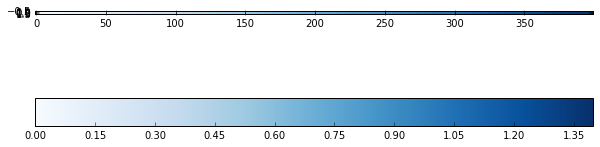

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict
from  matplotlib.patches import Rectangle




n = 400
compression = np.linspace(0,1.4, n)


# gradient = np.vstack((compression **.5, compression **.5))
gradient = np.vstack((compression, compression))
fig = plt.figure(figsize=(10, 10))
currentAxis = plt.gca()

size = 1/float(n) 
#for i in range(n):
#    currentAxis.add_patch(Rectangle((size, compression[i]),.2, size, fill=True, alpha=1, facecolor= colors[i]))


for i in range(n):
    plt.imshow(gradient, cmap = cm.Blues)


plt.colorbar(orientation="horizontal")
plt.show(block=False)